In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Computer vision
## Session 13d

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [2]:
# Import some libraries
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import cv2

%matplotlib inline

# %matplotlib notebook

In [3]:
# Some basic parameters
inpDir = '../../input'
outDir = '../output'
dataDir = 'basic_operations'

RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (9, 6),
          'axes.labelsize': 'medium',
          'axes.titlesize':'medium',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = 'jet'

LINE_THICK = 1

MARK_COLOR = (15, 82, 186)

## Helper function

In [4]:
# Function to read in a file

def fn_read_image(fileName):
    '''
    Args:
        fileName : Path of image file to read
    returns:
        im: image in cv2 format
        rgbIm: image in RGB format
    
    '''
    imgPath = os.path.join(inpDir, dataDir, fileName)
    
    # Read image file
    im = cv2.imread(imgPath, cv2.IMREAD_COLOR)
    
    
    if im is None:
        print('Could not open or find the image:', fileName)
        exit(0)
    else:
        # convert to RGB image
        rgbIm = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        return im, rgbIm

    
# Function to plot one image

def fn_plot_one_img(im, cmap = CMAP):
    
    '''
    Args:
        im : image to display and save
    
    '''
    # showing image
    plt.imshow(im, cmap = cmap)
    plt.axis('off')
    plt.show()

    
# Function to plot multiple images

def fn_plot_images(im_lst):
    '''
    Args:
        img_list: list of images
    '''
    nRows = 1
    nCols = len(im_lst)
    
    
    fig, axes = plt.subplots(nRows, nCols)
    
    for i in range(nCols):
        axes[i].imshow(im_lst[i]['img'], cmap = im_lst[i]['cmap'])
        axes[i].set_title(im_lst[i]['name'])

        axes[i].set_xticklabels([]);
        axes[i].set_yticklabels([]);
                
    plt.tight_layout()
    
    plt.show()

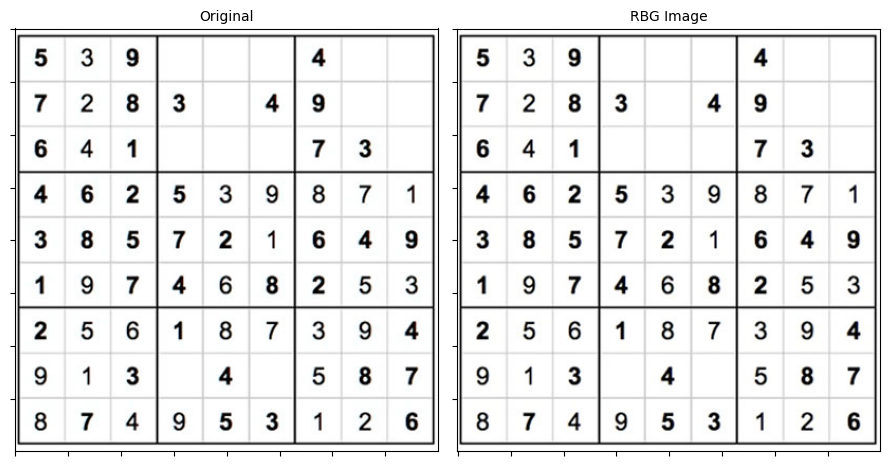

In [5]:
imgFileName = 'Sudoku-1.jpg'# 'parking1.png'#'Lionel_Messi_3.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

img_list = [{'img': srcImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': rgbImg, 'name': 'RBG Image', 'cmap': CMAP}]

fn_plot_images(img_list)

In [6]:
rgbImg.shape

(400, 400, 3)

In [7]:
# Convert to Gray Scale

grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

# take discrete fourier transform 
dft = cv2.dft(np.float32(grayImg),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))



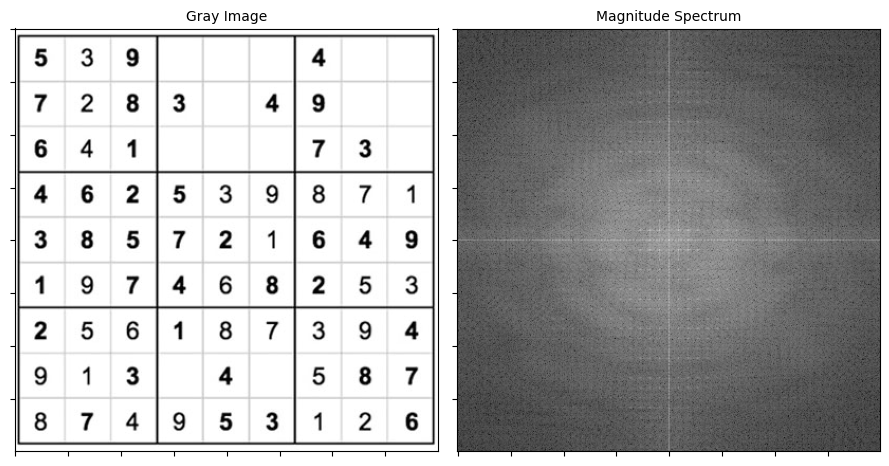

In [8]:
img_lst = [{'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': magnitude_spectrum, 'name': 'Magnitude Spectrum','cmap' : 'gray'}]

fn_plot_images(img_lst)

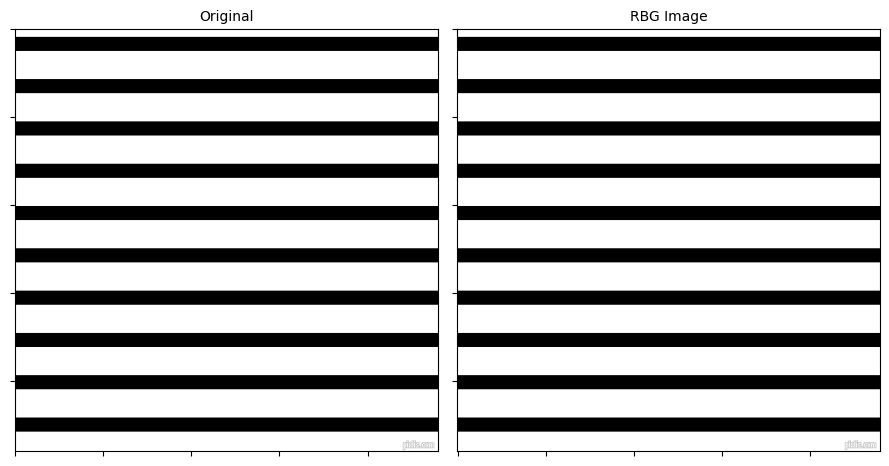

In [9]:
imgFileName = 'horizontal_lines.png'

srcImg, rgbImg = fn_read_image(imgFileName)

img_list = [{'img': srcImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': rgbImg, 'name': 'RBG Image', 'cmap': CMAP}]

fn_plot_images(img_list)

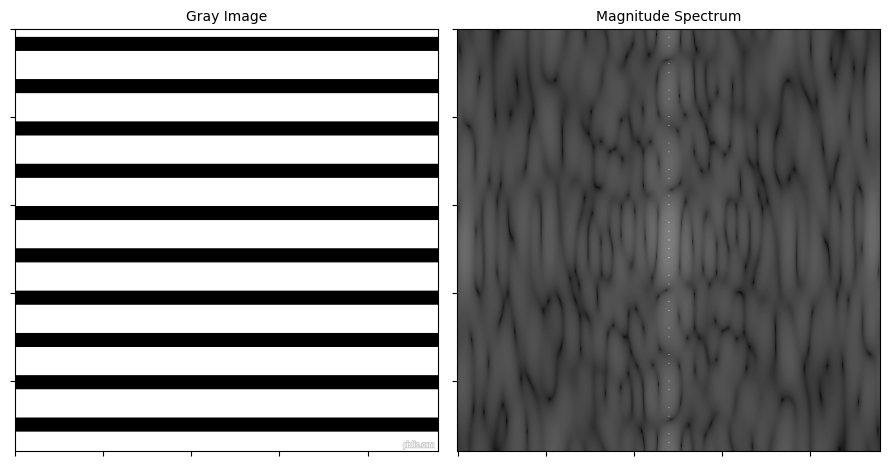

In [10]:
# Convert to Gray Scale

grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

# take discrete fourier transform 
dft = cv2.dft(np.float32(grayImg),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

img_lst = [{'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': magnitude_spectrum, 'name': 'Magnitude Spectrum','cmap' : 'gray'}]

fn_plot_images(img_lst)

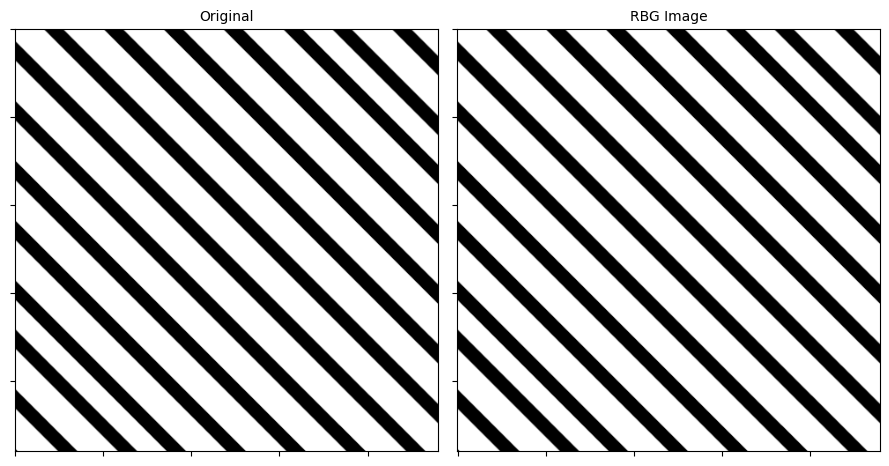

In [11]:
imgFileName = 'inclined_lines.png'

srcImg, rgbImg = fn_read_image(imgFileName)

img_list = [{'img': srcImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': rgbImg, 'name': 'RBG Image', 'cmap': CMAP}]

fn_plot_images(img_list)

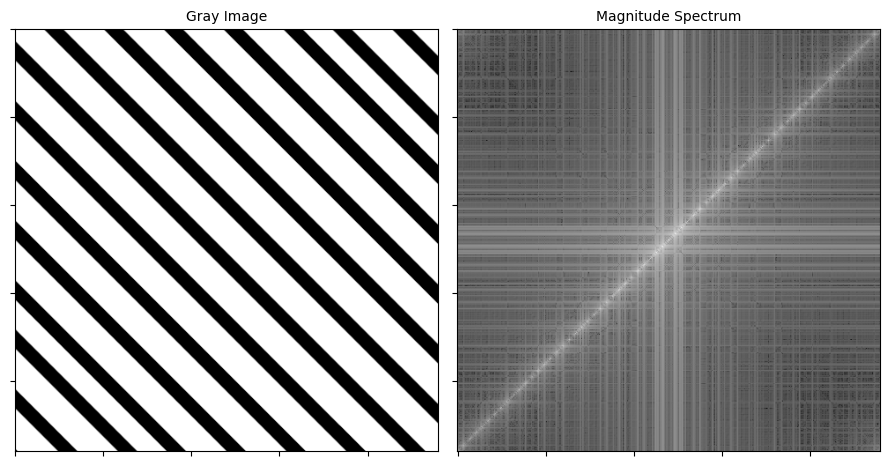

In [12]:
# Convert to Gray Scale

grayImg = cv2.cvtColor(srcImg, cv2.COLOR_BGR2GRAY)

# take discrete fourier transform 
dft = cv2.dft(np.float32(grayImg),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

img_lst = [{'img': grayImg, 'name': 'Gray Image','cmap' : 'gray'},
           {'img': magnitude_spectrum, 'name': 'Magnitude Spectrum','cmap' : 'gray'}]

fn_plot_images(img_lst)

## Pyramid Down

There are two common kinds of image pyramids:

- Gaussian pyramid: Used to downsample images
- Laplacian pyramid: Used to reconstruct an upsampled image from an image lower in the pyramid (with less resolution)

Output image is computed as Size(src.cols\*2, (src.rows\*2)

<img src='../../input/basic_operations/Image_pyramid.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

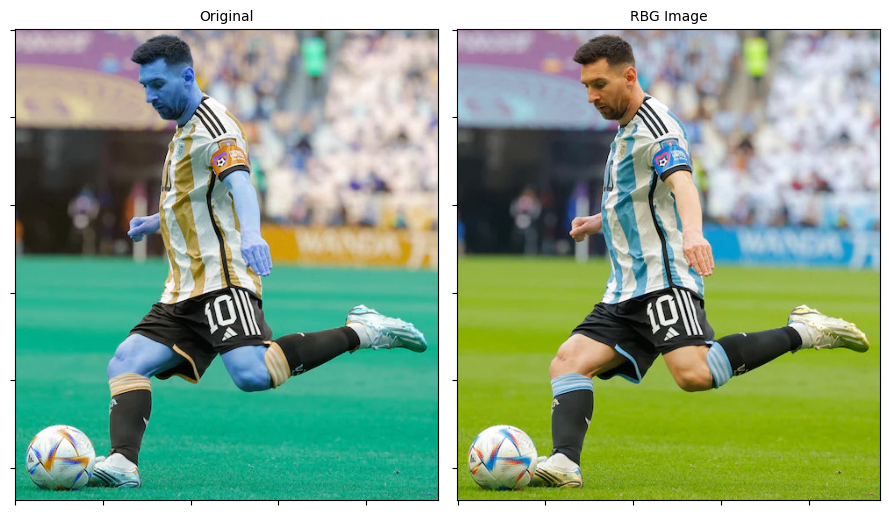

In [13]:
imgFileName = 'Lionel_Messi_3.jpg'

srcImg, rgbImg = fn_read_image(imgFileName)

img_list = [{'img': srcImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': rgbImg, 'name': 'RBG Image', 'cmap': CMAP}]

fn_plot_images(img_list)

In [14]:
lower_resolution1 = cv2.pyrDown(rgbImg)
print(lower_resolution1.shape)

lower_resolution2 = cv2.pyrDown(lower_resolution1)
print(lower_resolution2.shape)

lower_resolution3 = cv2.pyrDown(lower_resolution2)
print(lower_resolution3.shape)

higher_resolution3 = cv2.pyrUp(lower_resolution3)
print(higher_resolution3.shape)

higher_resolution2 = cv2.pyrUp(higher_resolution3)
print(higher_resolution2.shape)

higher_resolution1 = cv2.pyrUp(higher_resolution2)
print(higher_resolution1.shape)

(269, 241, 3)
(135, 121, 3)
(68, 61, 3)
(136, 122, 3)
(272, 244, 3)
(544, 488, 3)


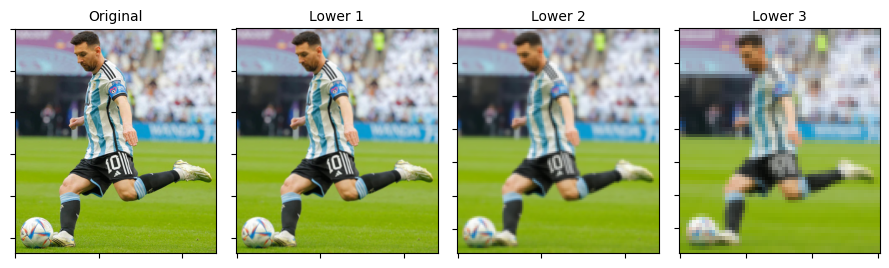

In [15]:
img_list = [{'img': rgbImg, 'name': 'Original', 'cmap': CMAP}, 
            {'img': lower_resolution1, 'name': 'Lower 1', 'cmap': CMAP},            
            {'img': lower_resolution2, 'name': 'Lower 2', 'cmap': CMAP},
            {'img': lower_resolution3, 'name': 'Lower 3', 'cmap': CMAP}]

fn_plot_images(img_list)

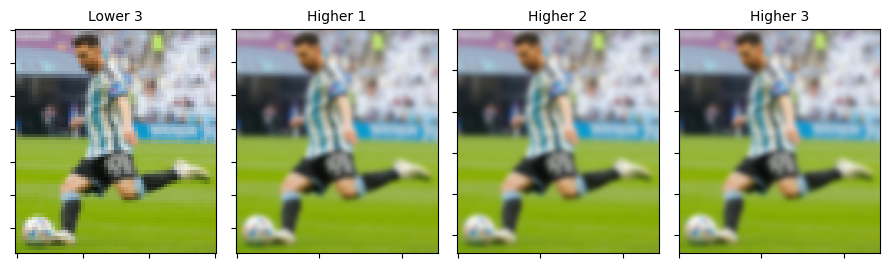

In [16]:
img_list = [{'img': lower_resolution3, 'name': 'Lower 3', 'cmap': CMAP}, 
            {'img': higher_resolution3, 'name': 'Higher 1', 'cmap': CMAP},            
            {'img': higher_resolution2, 'name': 'Higher 2', 'cmap': CMAP},
            {'img': higher_resolution1, 'name': 'Higher 3', 'cmap': CMAP}]

fn_plot_images(img_list)

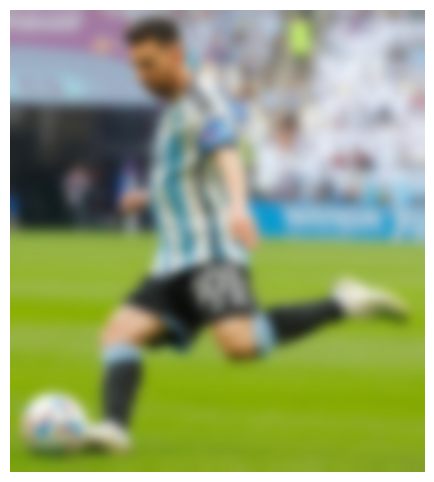

In [17]:
fn_plot_one_img(higher_resolution1)